# LAB 5 (03/10/2024) BTECH/10029/22

### QUESTION 1

Perform PCA on Diabetes Data to reduce the dimensionality to 4. Also draw a hit map to find the corelation among these PCs.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      0.0  26.6   
2            8    183.0           64.0            0.0      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627    5        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


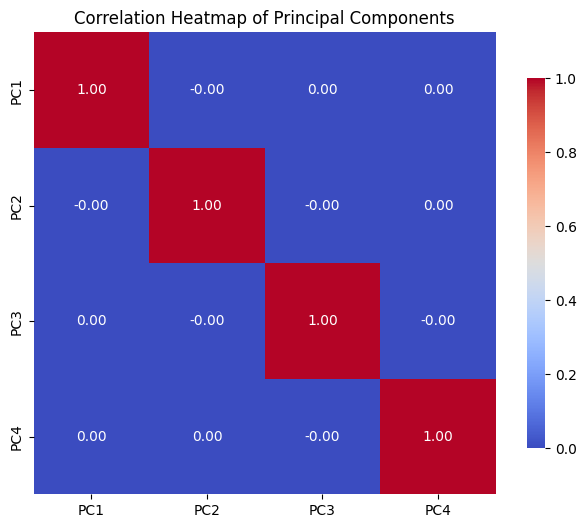

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Diabetes_zero.csv')

print(data.head())

X = data.values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

pc_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(4)])

corr_matrix = pc_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Principal Components')
plt.show()


### QUESTION 2

Apply linear regression on “tips” datasets from seaborn package and find the Mean Absolute 
Error, Mean Squared Error, Root Mean Squared Error and R2-score.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tips = sns.load_dataset('tips')

print(tips.head())

X = tips[['size', 'day']]
X = pd.get_dummies(X, drop_first=True)  
y = tips['total_bill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Mean Absolute Error: 5.70
Mean Squared Error: 50.02
Root Mean Squared Error: 7.07
R² Score: 0.41


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Diabetes_zero.csv')

# Optionally, inspect the data
print(data.head())

# Separate features and target variable if applicable
# Assuming the target variable is not included in the PCA
# If there is a target variable, you may need to modify this part
X = data.values  # or data.drop('target_column_name', axis=1).values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pc_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(4)])

# Calculate the correlation matrix
corr_matrix = pc_df.corr()

# Draw a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Principal Components')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

# Select features and target variable
# Here we can predict 'total_bill' based on 'size' and 'day'
X = tips[['size', 'day']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variable 'day' into dummy/indicator variables
y = tips['total_bill']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')
